In [1]:
from utils import main1 as main

Training Set:
{0: 12500, 2: 5000, 1: 7500}
Testing Set:
{0: 12500, 1: 7500, 2: 5000}
Training Set:
{0: 12500, 2: 5000, 1: 7500}
Testing Set:
{0: 12500, 1: 7500, 2: 5000}


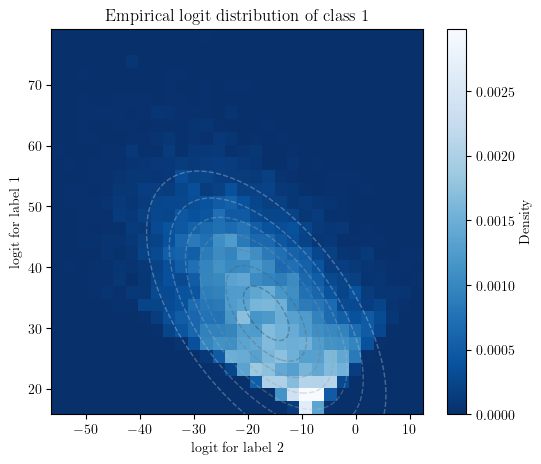

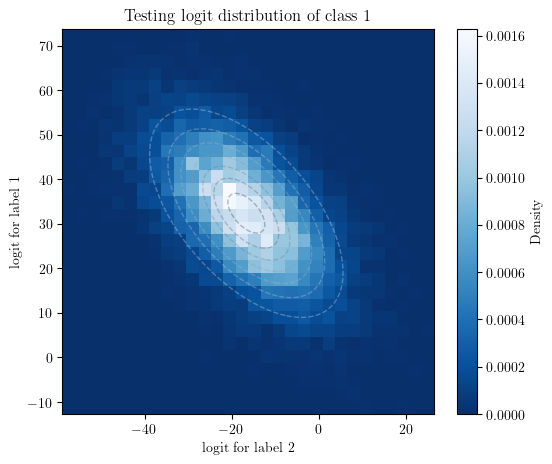

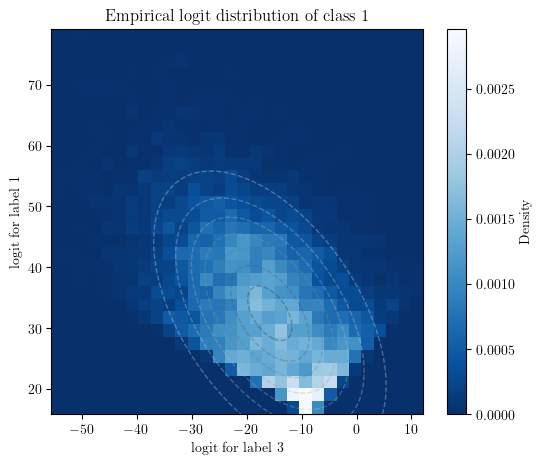

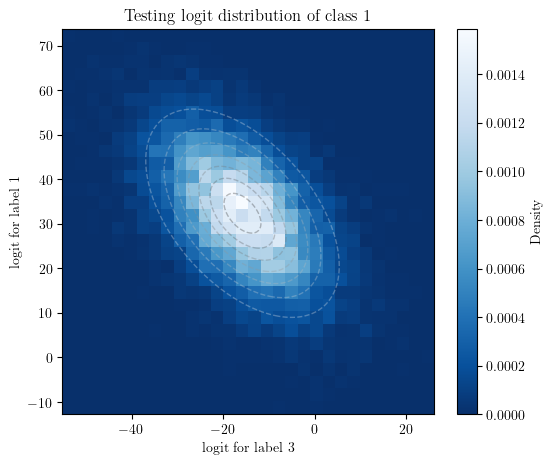

In [2]:
sub_class=(1, 2, 3)
C = 0
BB = [1, 2]
# If you want to re-generate the data, add `SIMULATE=True` to main() ONLY in the next line.
hist1, xedges1, yedges1, gauss_mean1, gauss_cov1, vmax1 = main(C=C, B1=BB[0], B2=C)
hist2, xedges2, yedges2, gauss_mean2, gauss_cov2, vmax2 = main(C=C, B1=BB[1], B2=C)

In [3]:
hist = [hist1, hist2]
xedges = [xedges1, xedges2]
yedges = [yedges1, yedges2]
gauss_means = [gauss_mean1, gauss_mean2]
gauss_covs = [gauss_cov1, gauss_cov2]
vmax = max(vmax1, vmax2)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import cm
from scipy.stats import multivariate_normal

with plt.style.context('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle'):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.5, 3), dpi=100, constrained_layout=True)
    cmap = cm.get_cmap('Blues').reversed()
    for idx, ax in enumerate(axs):
        ax.set_facecolor(cmap(0))
        c = ax.pcolormesh(xedges[idx], yedges[idx], hist[idx], cmap=cmap, shading='auto', vmin=0, vmax=vmax)
        if idx == 1:
            cbar = fig.colorbar(c, ax=ax, label='Density')
            cbar.formatter = ScalarFormatter(useMathText=True)
            cbar.formatter.set_powerlimits((0, 0))
            cbar.update_ticks()
            cbar.ax.yaxis.offsetText.set_visible(False)
            fig.text(
                0.925, 0.9, r"$\times 10^{-3}$",
                ha="left", va="center",
                color="black"
            )
        xpad, ypad = (0, 0)
        xlim = (np.min(xedges[idx])-xpad, np.max(xedges[idx])+xpad)
        ylim = (np.min(yedges[idx])-ypad, np.max(yedges[idx])+ypad)
        x = np.linspace(*xlim, 200)
        y = np.linspace(*ylim, 200)
        X, Y = np.meshgrid(x, y)
        pos = np.dstack([X, Y])
        normal = multivariate_normal(mean=gauss_means[idx], cov=gauss_covs[idx])
        Z = normal.pdf(pos)
        ax.contour(X, Y, Z, cmap=cm.get_cmap('Greys'), linewidths=1,
                   levels=4,
                   linestyles='dashed', alpha=0.3)
        ax.set_xlabel(f'logit for label {sub_class[BB[idx]]}', fontsize=14)
        if idx == 0:
            ax.set_ylabel(f'logit for label {sub_class[C]}', fontsize=14)
        else:
            ax.set_yticks([])
        ax.tick_params(axis='both', labelsize=12)
    fig.suptitle(rf'\textbf{{Logit distribution of class {sub_class[C]}}}', fontsize=16)
    plt.savefig(f'GMM({sub_class[C]},{sub_class[BB[0]]},{sub_class[BB[1]]}).pdf')

C:\Users\10029\AppData\Local\Temp\ipykernel_13536\365225800.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues').reversed()
C:\Users\10029\AppData\Local\Temp\ipykernel_13536\365225800.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.contour(X, Y, Z, cmap=cm.get_cmap('Greys'), linewidths=1,
